<a href="https://colab.research.google.com/github/gunjanak/Digital_Image_processing/blob/main/5_Frequency_Domain_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Frequency Domain Filtering***

Steps in frequency domain filtering



*   Compute the Fourier Transform
*   Multiply the result by a filter transform function
* Take the inverse transform to produce the enchanced image



In [1]:
from scipy import fftpack
import numpy as np
import imageio
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


In [2]:
def low_pass_filter(image1):
  #convert image to numpy array
  image1_np=np.array(image1)
  #fft of image
  fft1 = fftpack.fftshift(fftpack.fft2(image1_np))
  #Create a low pass filter image
  x,y = image1_np.shape[0],image1_np.shape[1]

  #defining filter
  #size of circle
  e_x,e_y=50,50
  #create a box 
  bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))
  low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=0)
  draw1=ImageDraw.Draw(low_pass)
  draw1.ellipse(bbox, fill=1)
  low_pass_np=np.array(low_pass)
  low_pass_np = low_pass_np.T
  #end of defining filter

  #multiply both the images
  filtered=np.multiply(fft1,low_pass_np)

  #inverse fft
  ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
  ifft2 = np.maximum(0, np.minimum(ifft2, 255))
  data = Image.fromarray(ifft2)  
  data = data.convert("L") 

  return data

In [3]:
def high_pass_filter(image):
  #converting image to array
  image_array = np.array(image)

  #sending image to low pass filter
  lowpass_image = low_pass_filter(image)
  #converting image to array
  lowpass_image_array = np.array(lowpass_image)



  #subtracting lowpass image from original to obtain highpass image
  high_pass_array = image_array - lowpass_image_array

  #array to image
  high_pass_image = Image.fromarray(high_pass_array)  
  high_pass_image = high_pass_image.convert("L")

  return high_pass_image

Text(0.5, 1.0, 'highpass_image')

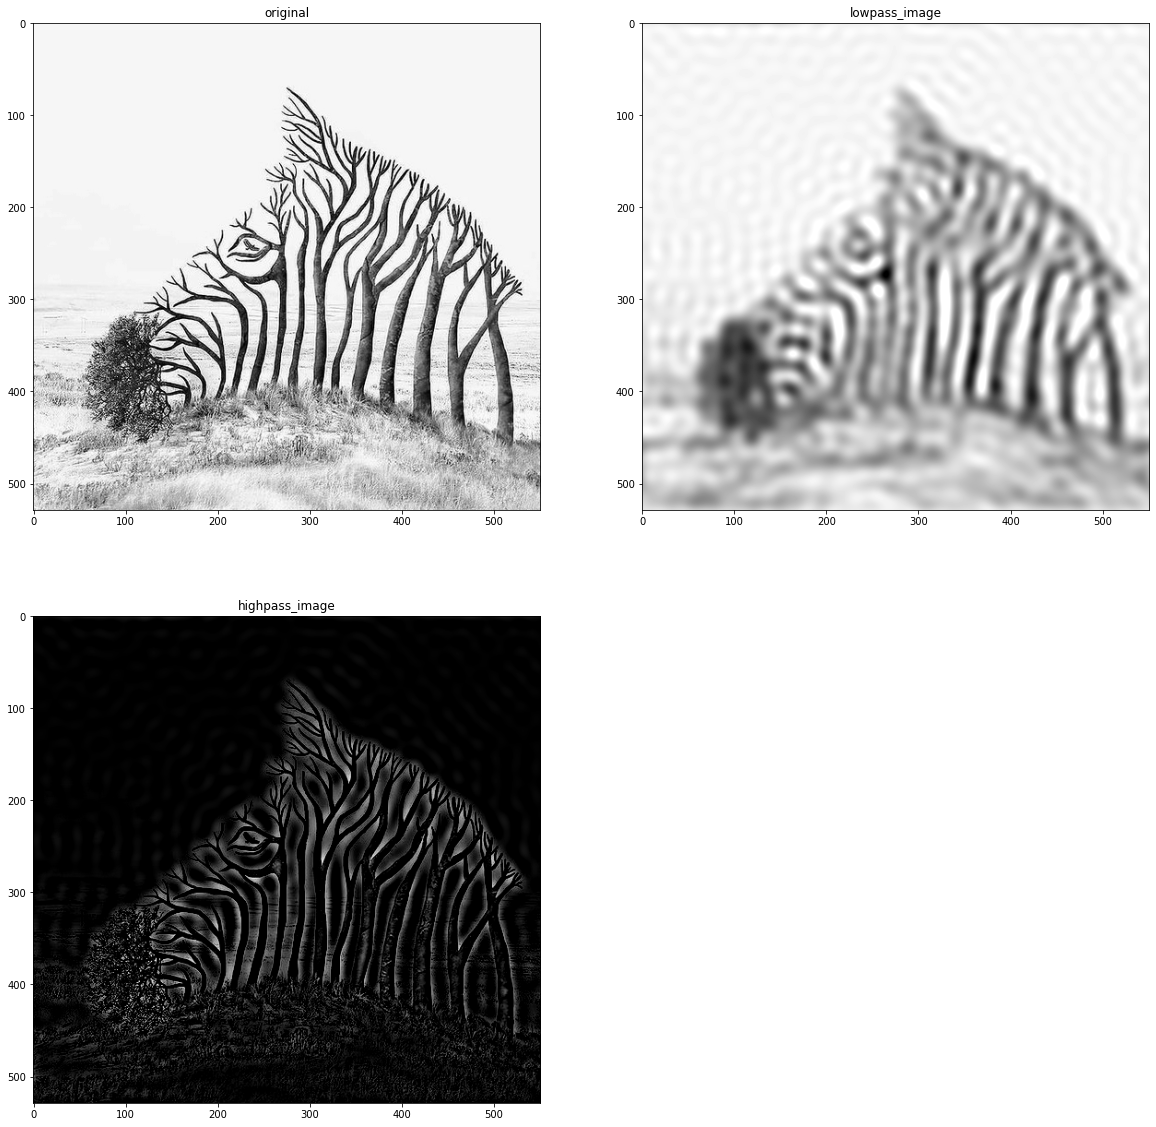

In [12]:
image1 = imageio.imread('/content/drive/MyDrive/Colab Notebooks/image_processing/images/trees.png',as_gray=True)
lowpass_image = low_pass_filter(image1)
highpass_image = high_pass_filter(image1)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

#plotting original image
fig.add_subplot(2,2,1)
plt.imshow(image1, cmap='gray')
plt.title('original')

#plotting lowpass image
fig.add_subplot(2,2,2)
plt.imshow(lowpass_image, cmap='gray')
plt.title('lowpass_image')

#plotting highpass image
fig.add_subplot(2,2,3)
plt.imshow(highpass_image, cmap='gray')
plt.title('highpass_image')